Patrick Walsh
In this notebook I explore Pittsburgh Police Arrest Data to Discover which neighborhood is the safest based on crime.
https://data.wprdc.org/dataset/arrest-data



In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

crime = pd.read_csv("arrestdata.csv")
crime.head(10)



,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,7,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,8,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,9,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,10,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Central Business District    4238
South Side Flats             3377
Carrick                      2297
East Allegheny               2153
Homewood South               2044
                             ... 
Regent Square                  36
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


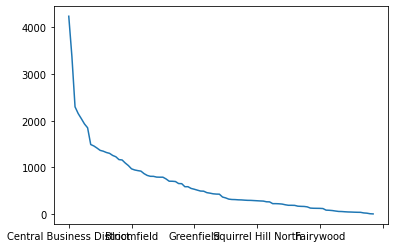

In [25]:
print(crime['INCIDENTNEIGHBORHOOD'].value_counts())
crime['INCIDENTNEIGHBORHOOD'].value_counts().plot()


    

Based on these initial findings, Mt. Oliver Neighborhood appears to be the safest, with the Central Business District being the most dangerous.  Unfortunately, the arrest dataset did not contain any population data for the neighborhoods, so this is only the amount of crimes in a neighborhood, not the amount of crimes per an amount of people.

I also wanted to find out how these neighborhoods were specifically with violent crime.

In [11]:

print(crime['OFFENSES'])




0                                       3929 Retail Theft.
1             13(a)(16) Possession of Controlled Substance
2                                       3929 Retail Theft.
3        5503 Disorderly Conduct. / 5505 Public Drunken...
4        2702 Aggravated Assault. / 2705 Recklessy Enda...
                               ...                        
64847    13(a)(16) Possession of Controlled Substance /...
64848    3701 Robbery. / 2701(a)(1) Simple Assault - In...
64849    2706 Terroristic Threats. / 2709(a)(1) Harassm...
64850    901 Criminal Attempt / 907 Possessing Instrume...
64851                                   9501 Bench Warrant
Name: OFFENSES, Length: 64852, dtype: object


This helps me figure out what the different offenses are, and what I need to search for to find violent crimes

Central Business District    842
South Side Flats             813
Carrick                      763
Marshall-Shadeland           572
Homewood North               527
                            ... 
Outside State                  6
Mt. Oliver Boro                5
Mt. Oliver Neighborhood        1
Central Northside              1
Outside County                 1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64


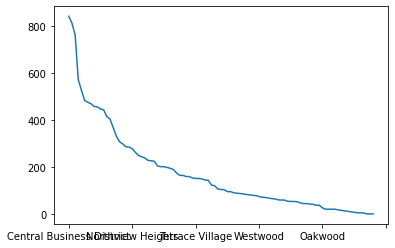

In [21]:

query_mask = crime['OFFENSES'].str.contains('Assault', na = False)
assault = crime[query_mask]
print(assault['INCIDENTNEIGHBORHOOD'].value_counts())

assault['INCIDENTNEIGHBORHOOD'].value_counts().plot()



    


Mt Oliver also has the lowest amount of assaults, and the Mt Oliver Borough has the second least.



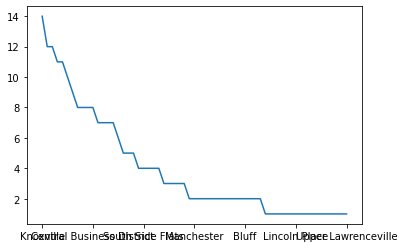

In [8]:
query_mask = crime['OFFENSES'].str.contains('Homicide', na = False)
homicide = crime[query_mask]
homicide['INCIDENTNEIGHBORHOOD'].value_counts().plot()

This graph has less elements than the previous one because it does not show neighborhoods with 0 homicides.  Mt Oliver does not have any murders, and is still appearing to be the safest neighborhood in terms of crime.

In [23]:
query_mask = crime['OFFENSES'].str.contains('Rape', na = False)
rape = crime[query_mask]
print(rape['INCIDENTNEIGHBORHOOD'].value_counts)


<bound method IndexOpsMixin.value_counts of 190      NaN
518      NaN
576      NaN
779      NaN
940      NaN
        ... 
63051    NaN
63775    NaN
64171    NaN
64348    NaN
64351    NaN
Name: INCIDENTNEIGHBORHOOD, Length: 184, dtype: object>


Arrests for rape do not contain and information about the location, so I was not able to factor that into my search.

If I assign normal crimes a value of 1 and violent crimes a value of 2, multiply the amount of those crimes and add them, I get my crime score.  Arrests for Rape did not factor into this because the neighborhood is not listed for rapes.  Mt Oliver has the lowest with a score of 4, Troy Hill-Herrs Island is in second with a score of 6, Central Northside is third with a score of 25, and Mt Oliver Borough is fourth with a score of 28.